In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [ ]:
path = '/content/drive/MyDrive/data/train_1/'
images = sorted(os.listdir(path))

In [ ]:
img = cv.imread('/content/drive/MyDrive/data/test/IMG_3493.JPG')
img2 = img.copy()

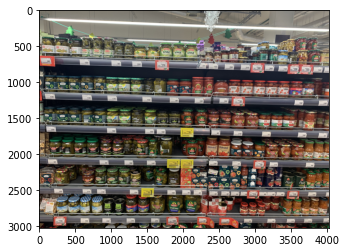

In [ ]:
Img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(Img)

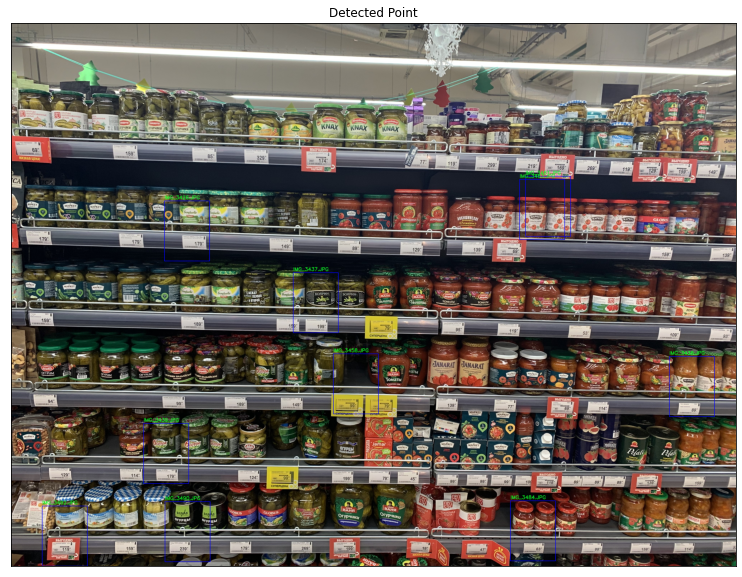

In [ ]:
#methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF']
dim = (251, 334)

img = img2.copy()
method = cv.TM_CCOEFF

for image in images:
  template = cv.imread(path + image)
  template = cv.resize(template, dim, interpolation = cv.INTER_AREA) 
  w, h = template.shape[1::-1]
  res = cv.matchTemplate(img, template, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method == cv.TM_SQDIFF:
      top_left = min_loc
  else:
      top_left = max_loc

  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img, top_left, bottom_right, 255, 2)
  cv.putText(img, image, (top_left[0], top_left[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)


plt.figure(figsize=(20,10))
Img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(Img)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
plt.imshow(Img)
cv.imwrite('dum_opencv.png', Img[:,:,::-1])